# Introduction and basic usage of the NCrystal Python API

This notebook describes the basic typical usage of NCrystal Python API, and lays the foundation for further more detailed tutorials.

## Preamble ##
Fix dependencies and tune jupyter a bit. Feel free to replace as you wish:

In [1]:
#Uncomment to get dependencies via pip:
!pip install --quiet ipympl numpy matplotlib spglib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
%matplotlib ipympl

In [1]:
import matplotlib
matplotlib.rcParams.update({"figure.figsize":(6.4*0.5,4.8*0.5),"figure.dpi":150,'font.size':5,"figure.autolayout": True})
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%html
<style>div.jupyter-widgets.widget-label {display: none;}</style>

Always import NCrystal of course:

In [2]:
import NCrystal as NC
assert NC.version_num >=  3006000
NC.test() #< quick unit test that installation works!

Tests completed succesfully


## Testing the SANS hard-spheres model

In [3]:
c = NC.NCMATComposer("Al_sg225.ncmat")

----------------------------------------------------------------------------------------------------
------------------------------------   NCrystal Material Info   ------------------------------------
----------------------------------------------------------------------------------------------------
Data source: <anonymous-ncmat-data>
----------------------------------------------------------------------------------------------------
Density : 2.69865 g/cm3, 0.0602324 atoms/Aa^3
----------------------------------------------------------------------------------------------------
Composition (by mole): 100% Al
----------------------------------------------------------------------------------------------------
Composition (by mass): 100% Al
----------------------------------------------------------------------------------------------------
Atom data:
   Al = Al(cohSL=3.449fm cohXS=1.49485barn incXS=0.0082barn absXS=0.231barn mass=26.9815u Z=13)
------------------------------------------

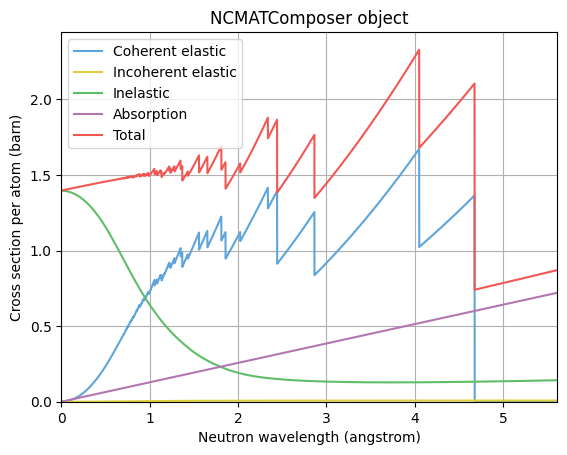

In [5]:
c.inspect()

In [6]:
c.add_hard_sphere_sans_model(50)

In [7]:
c.add_secondary_phase(0.05,'void.ncmat')

In [8]:
mat = c.load('comp=sans')

NCrystal::NCMATLoader WARNING: Loading NCMAT data which has @CUSTOM_ section(s). This is OK if intended.


In [9]:
print(mat.scatter.__dir__())

['_rawobj_scat', '_rawobj', '_rawunref', '_RCBase__rawobj_byref', '__module__', '__doc__', '__init__', 'clone', 'sampleScatter', 'sampleScatterIsotropic', 'generateScattering', 'generateScatteringNonOriented', 'scatter', 'genscat', 'rngSupportsStateManipulation', 'getRNGState', 'setRNGState', 'getCalcName', 'getName', 'name', 'getUniqueID', 'uid', 'domain', 'isNull', 'isNonOriented', 'isOriented', 'crossSection', 'crossSectionIsotropic', 'crossSectionNonOriented', 'xsect', '_parseekin', 'getSummary', 'dump', 'plot', '__del__', 'refCount', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


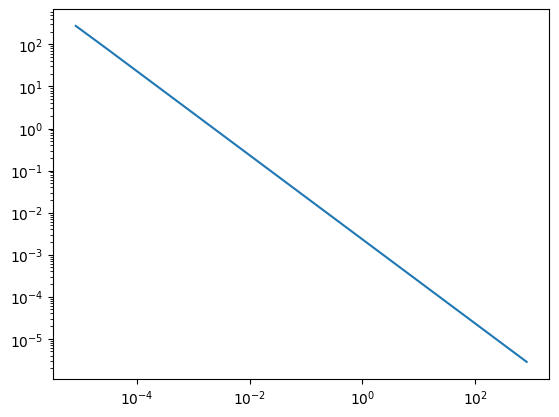

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
inc_wls = np.logspace(-2,2,1000)
energies = NC.wl2ekin(inc_wls)
y= mat.scatter.crossSectionIsotropic(energies)
plt.plot(energies, y)
plt.yscale('log')
plt.xscale('log')
plt.show()


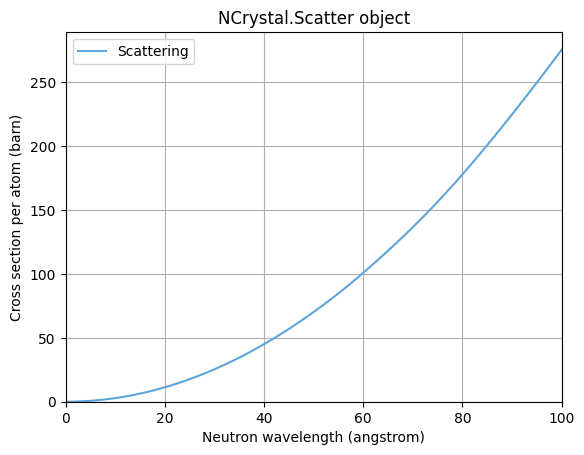

In [13]:
mat.scatter.plot(xmax=100)

In [14]:
s=mat.scatter

In [15]:
import NCrystal.constants as ncconstants
wl=10
k=ncconstants.wl2k(wl)
ekin_f,mu=s.scatter(wl=wl,repeat=int(1e7))
mu,k

(array([0.99901972, 0.95452765, 0.99773028, ..., 0.99813015, 0.99997417,
        0.99528693]),
 0.6283185307179586)

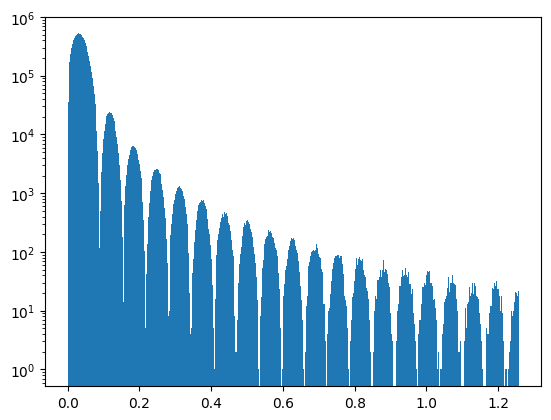

In [16]:
q = 2*k*np.sin(0.5*np.arccos(mu))
plt.figure()
plt.hist(q,bins=500)
plt.semilogy()
plt.show()